In [1]:
import scarches as sca
import anndata as ad
from scipy import stats 
import scanpy as sc

/home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")
Global seed set to 0
/home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/site-packages/pytorch_lightning-1.7.7-py3.7.egg/pytorch_lightning/utilities/warnings.py:54: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  "pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6"
/home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/si

In [2]:
adata_full = ad.read_h5ad("/lustre/groups/ml01/workspace/weixu.wang/reference.mapping.DE/data/blish_sars/adata_full.h5ad")

In [3]:
full_model = sca.models.SCVI.load("/lustre/groups/ml01/workspace/weixu.wang/reference.mapping.DE/vae_full_model/", adata_full, use_gpu = True)
query_model = sca.models.SCVI.load("/lustre/groups/ml01/workspace/weixu.wang/reference.mapping.DE/vae_query_model/", adata_full, use_gpu = True)

INFO     File /lustre/groups/ml01/workspace/weixu.wang/reference.mapping.DE/vae_full_model/model.pt already        
         downloaded                                                                                                
INFO     File /lustre/groups/ml01/workspace/weixu.wang/reference.mapping.DE/vae_query_model/model.pt already       
         downloaded                                                                                                


In [4]:
adata_full.obsm["X_scVI_full"] = full_model.get_latent_representation()
adata_full.obsm["X_scVI_query"] = query_model.get_latent_representation()
sc.pp.neighbors(adata_full, use_rep = "X_scVI_full")
sc.tl.umap(adata_full, min_dist = 0.3)

In [5]:
celltype = adata_full.obs["cell_type_fine"].values.tolist()
celltype_coarse = adata_full.obs["cell_type_coarse"].values.tolist()
#celltype[ind.astype(int)] = adata_full.obs["cell_type_coarse"].values[adata_full.obs["cell_type_coarse"].values=='CD8 T'].tolist()

In [6]:
my_list = ['CD8 T' if celltype_coarse[i]=='CD8 T' else celltype[i] for i in range(len(celltype))]
my_list2 = ['CD4 T' if celltype_coarse[i]=='CD4 T' else my_list[i] for i in range(len(celltype))]

In [7]:
adata_full.obs["celltype"] = my_list2

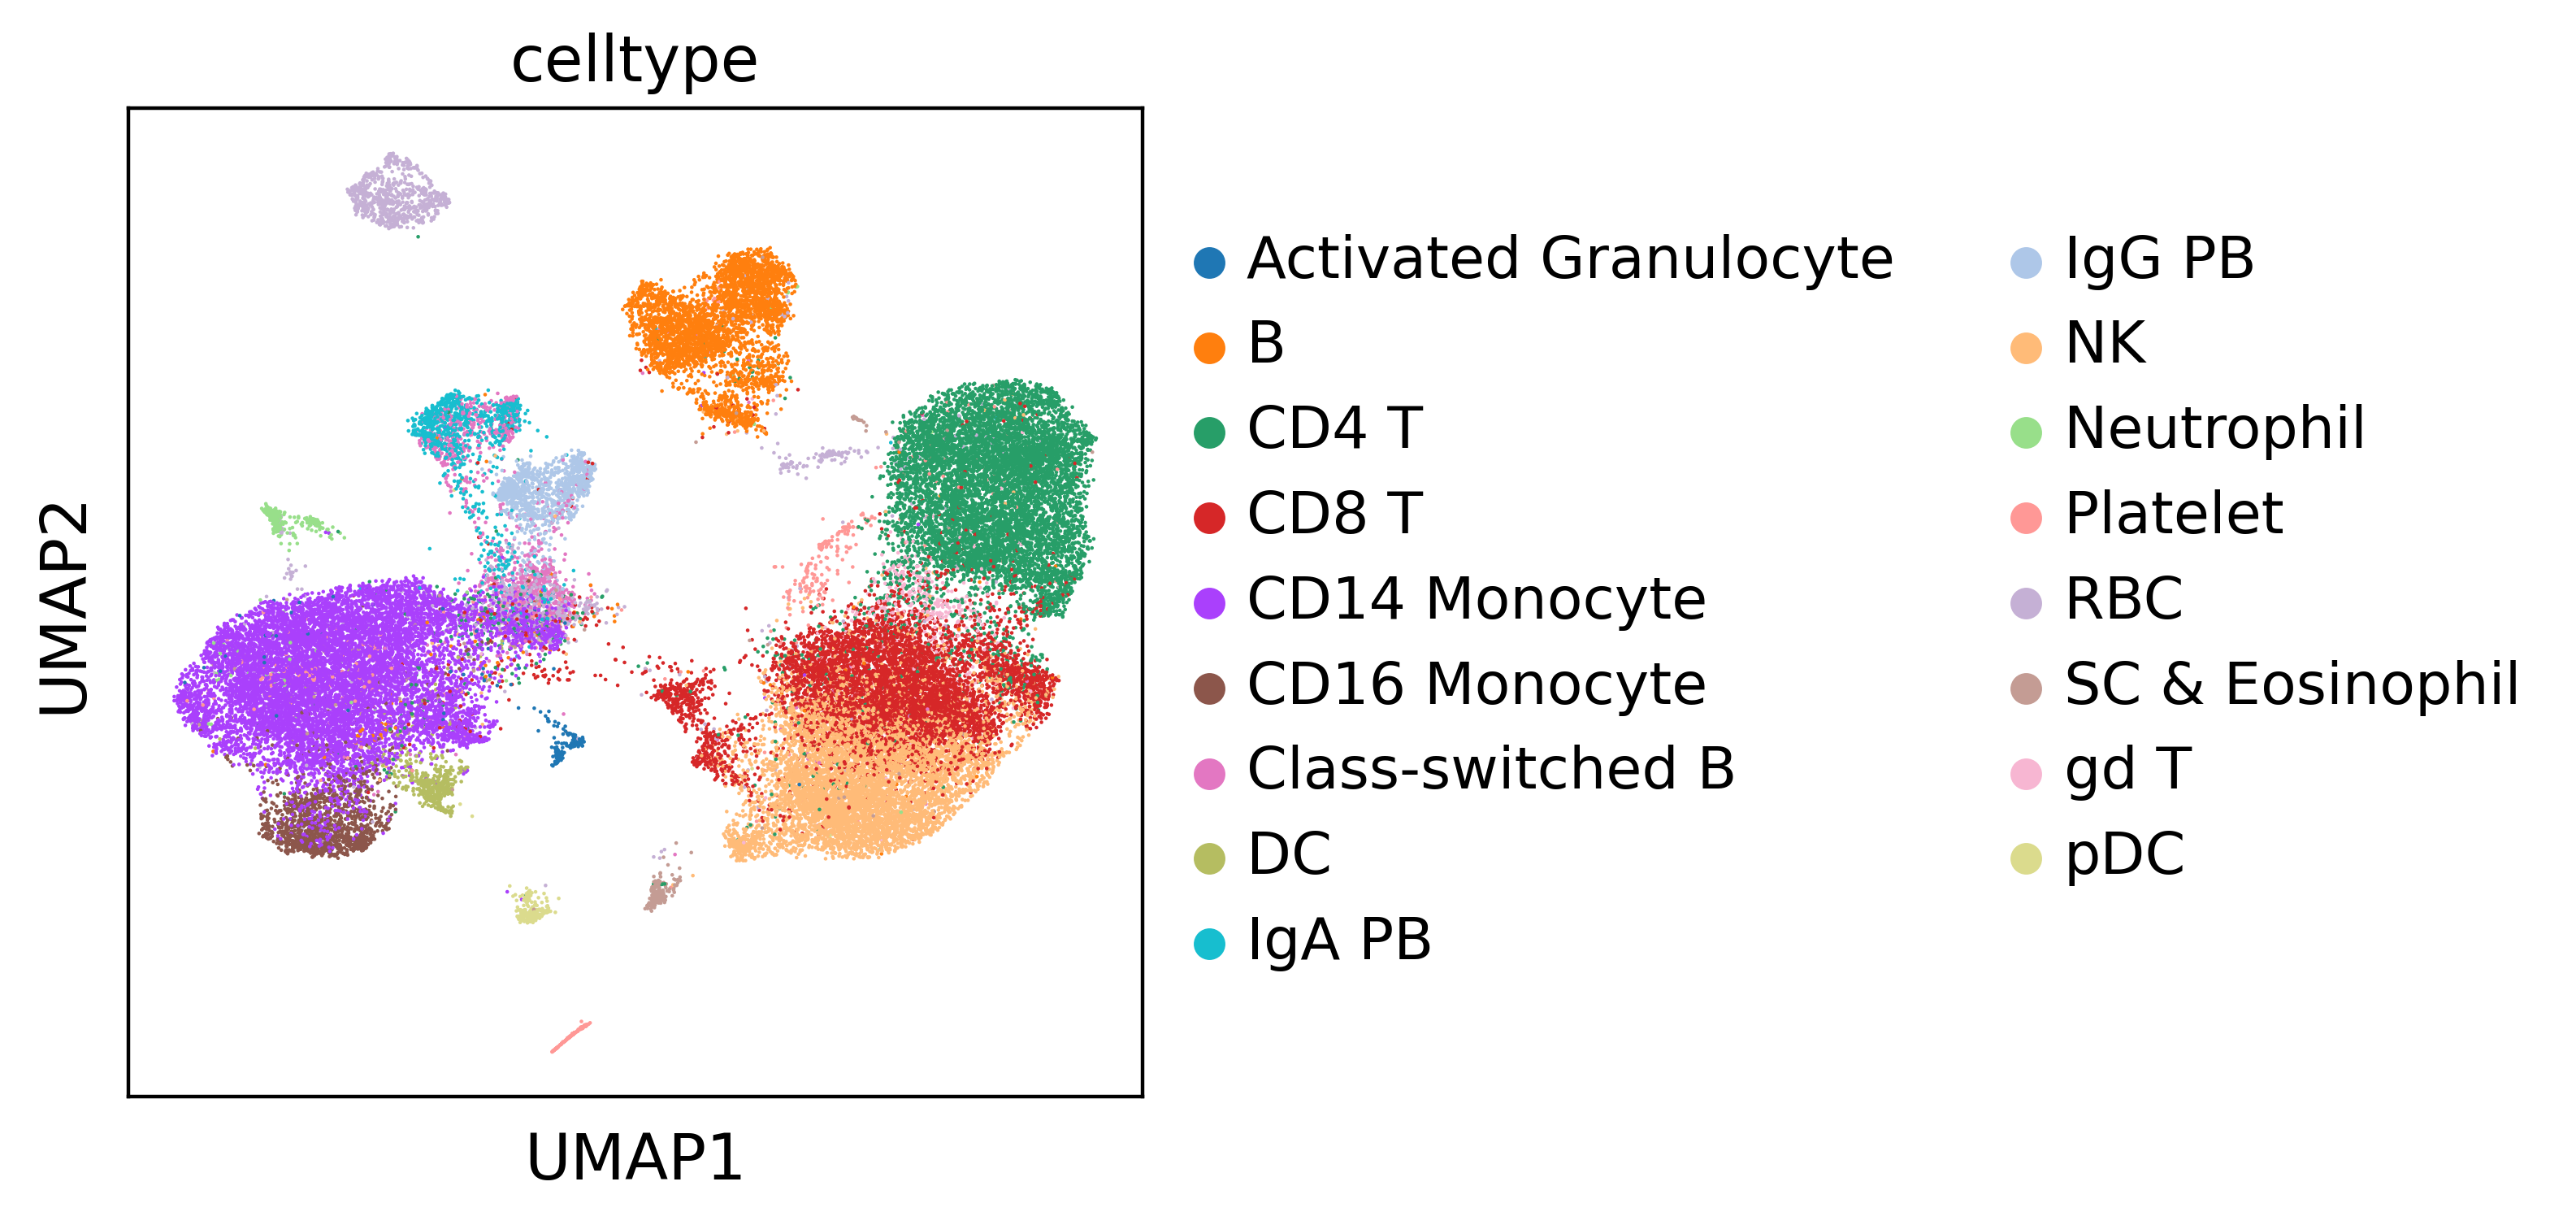

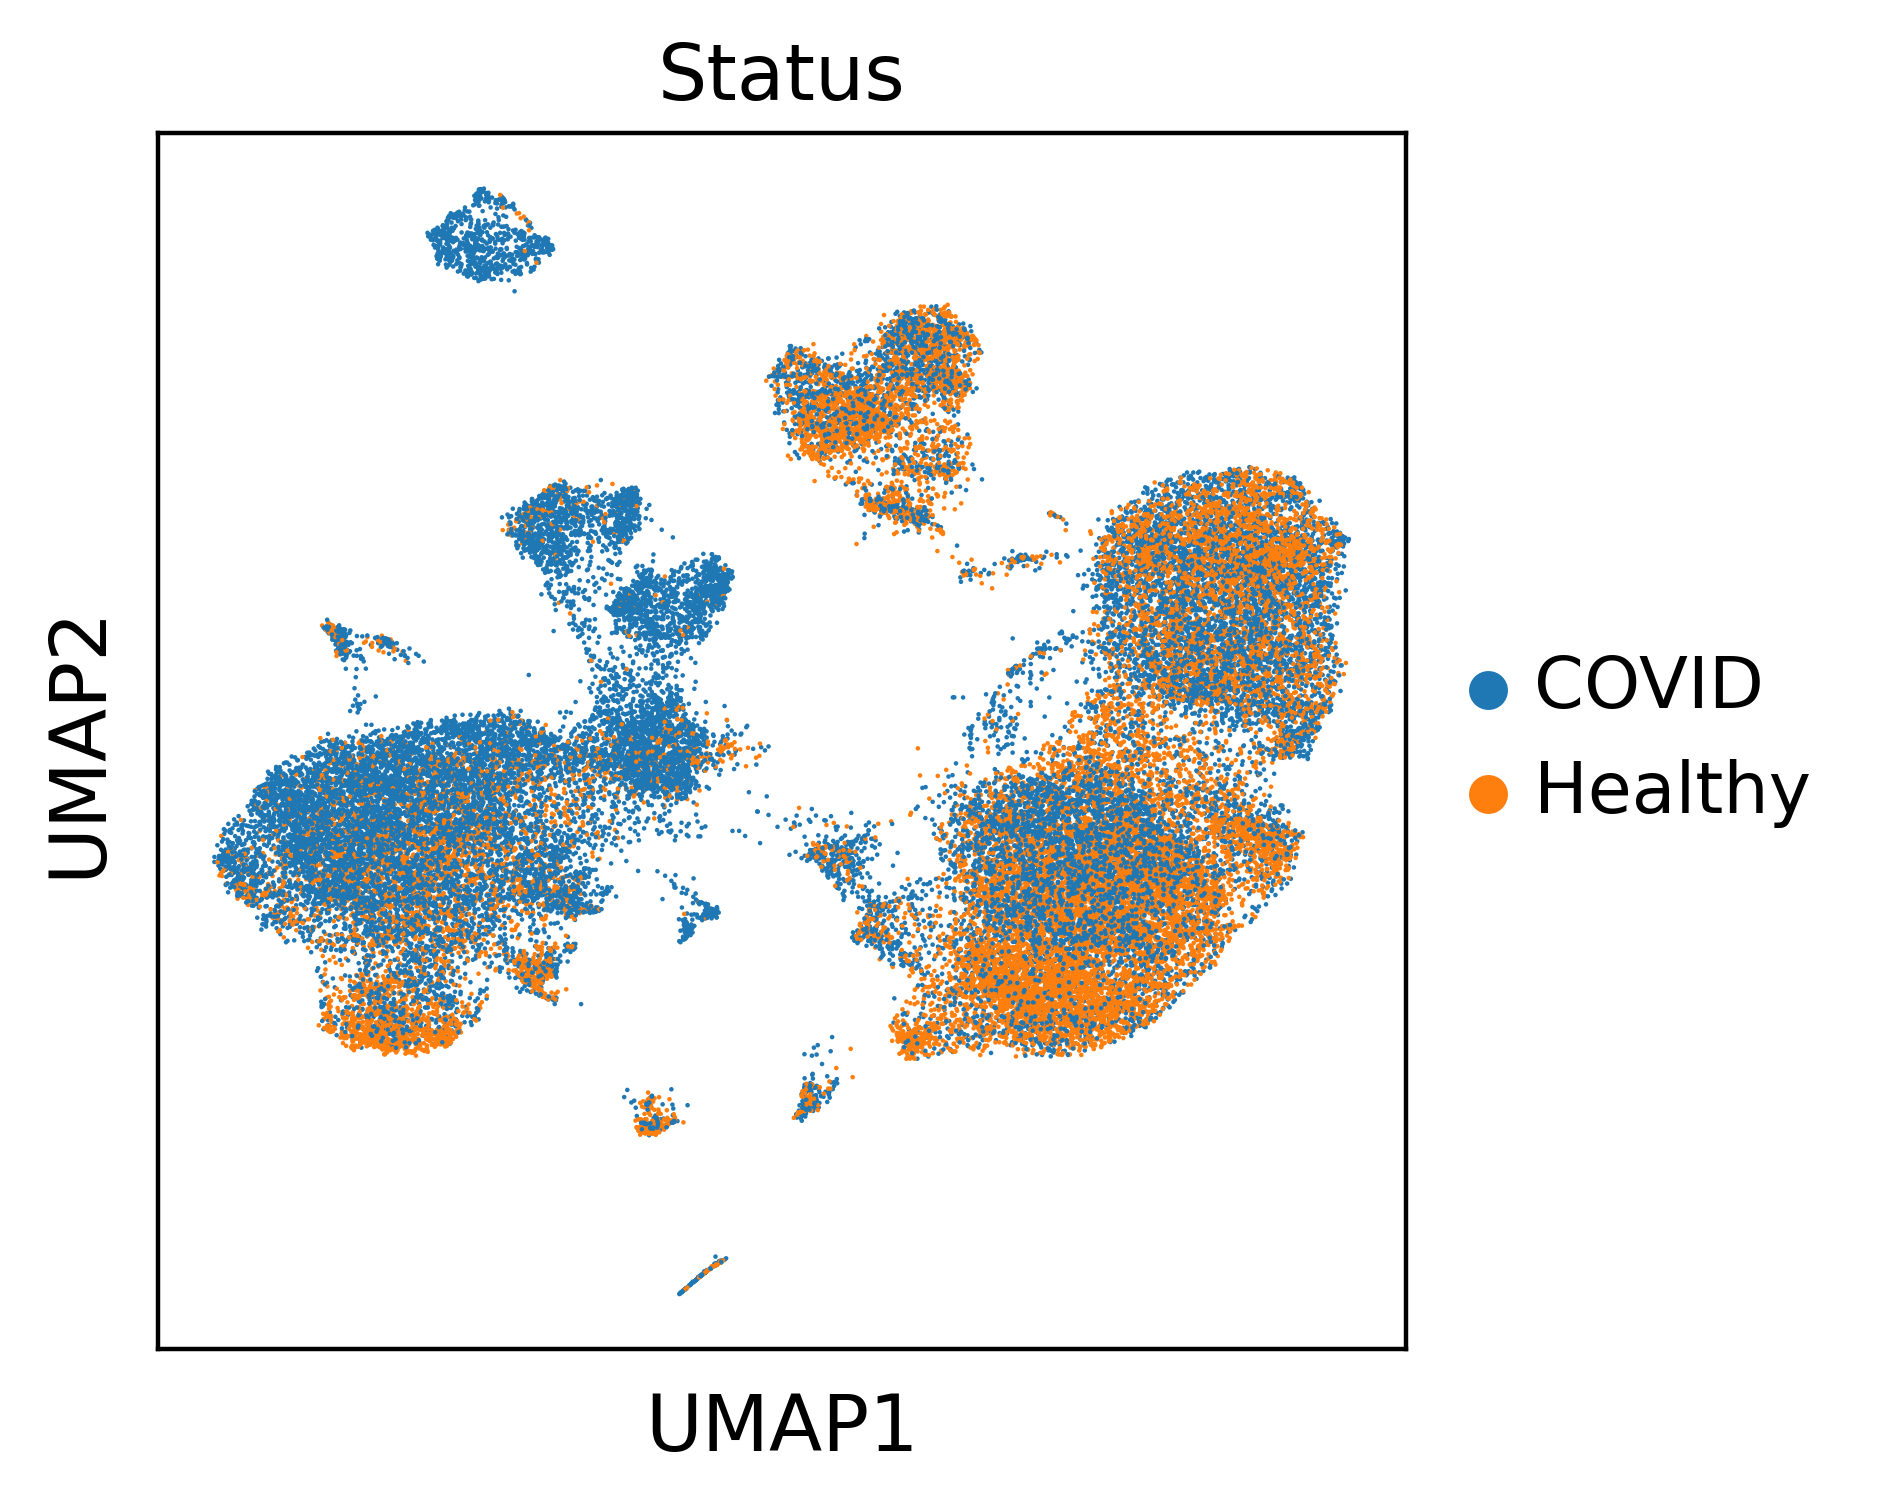

In [8]:
sc.pl.umap(
    adata_full,
    color = ["celltype"]
    #frameon = False,
)
sc.pl.umap(
    adata_full,
    color = ["Status"],
    #frameon = False,
)

In [9]:
sc.pp.neighbors(adata_full, use_rep = "X_scVI_query")
sc.tl.umap(adata_full, min_dist = 0.3)

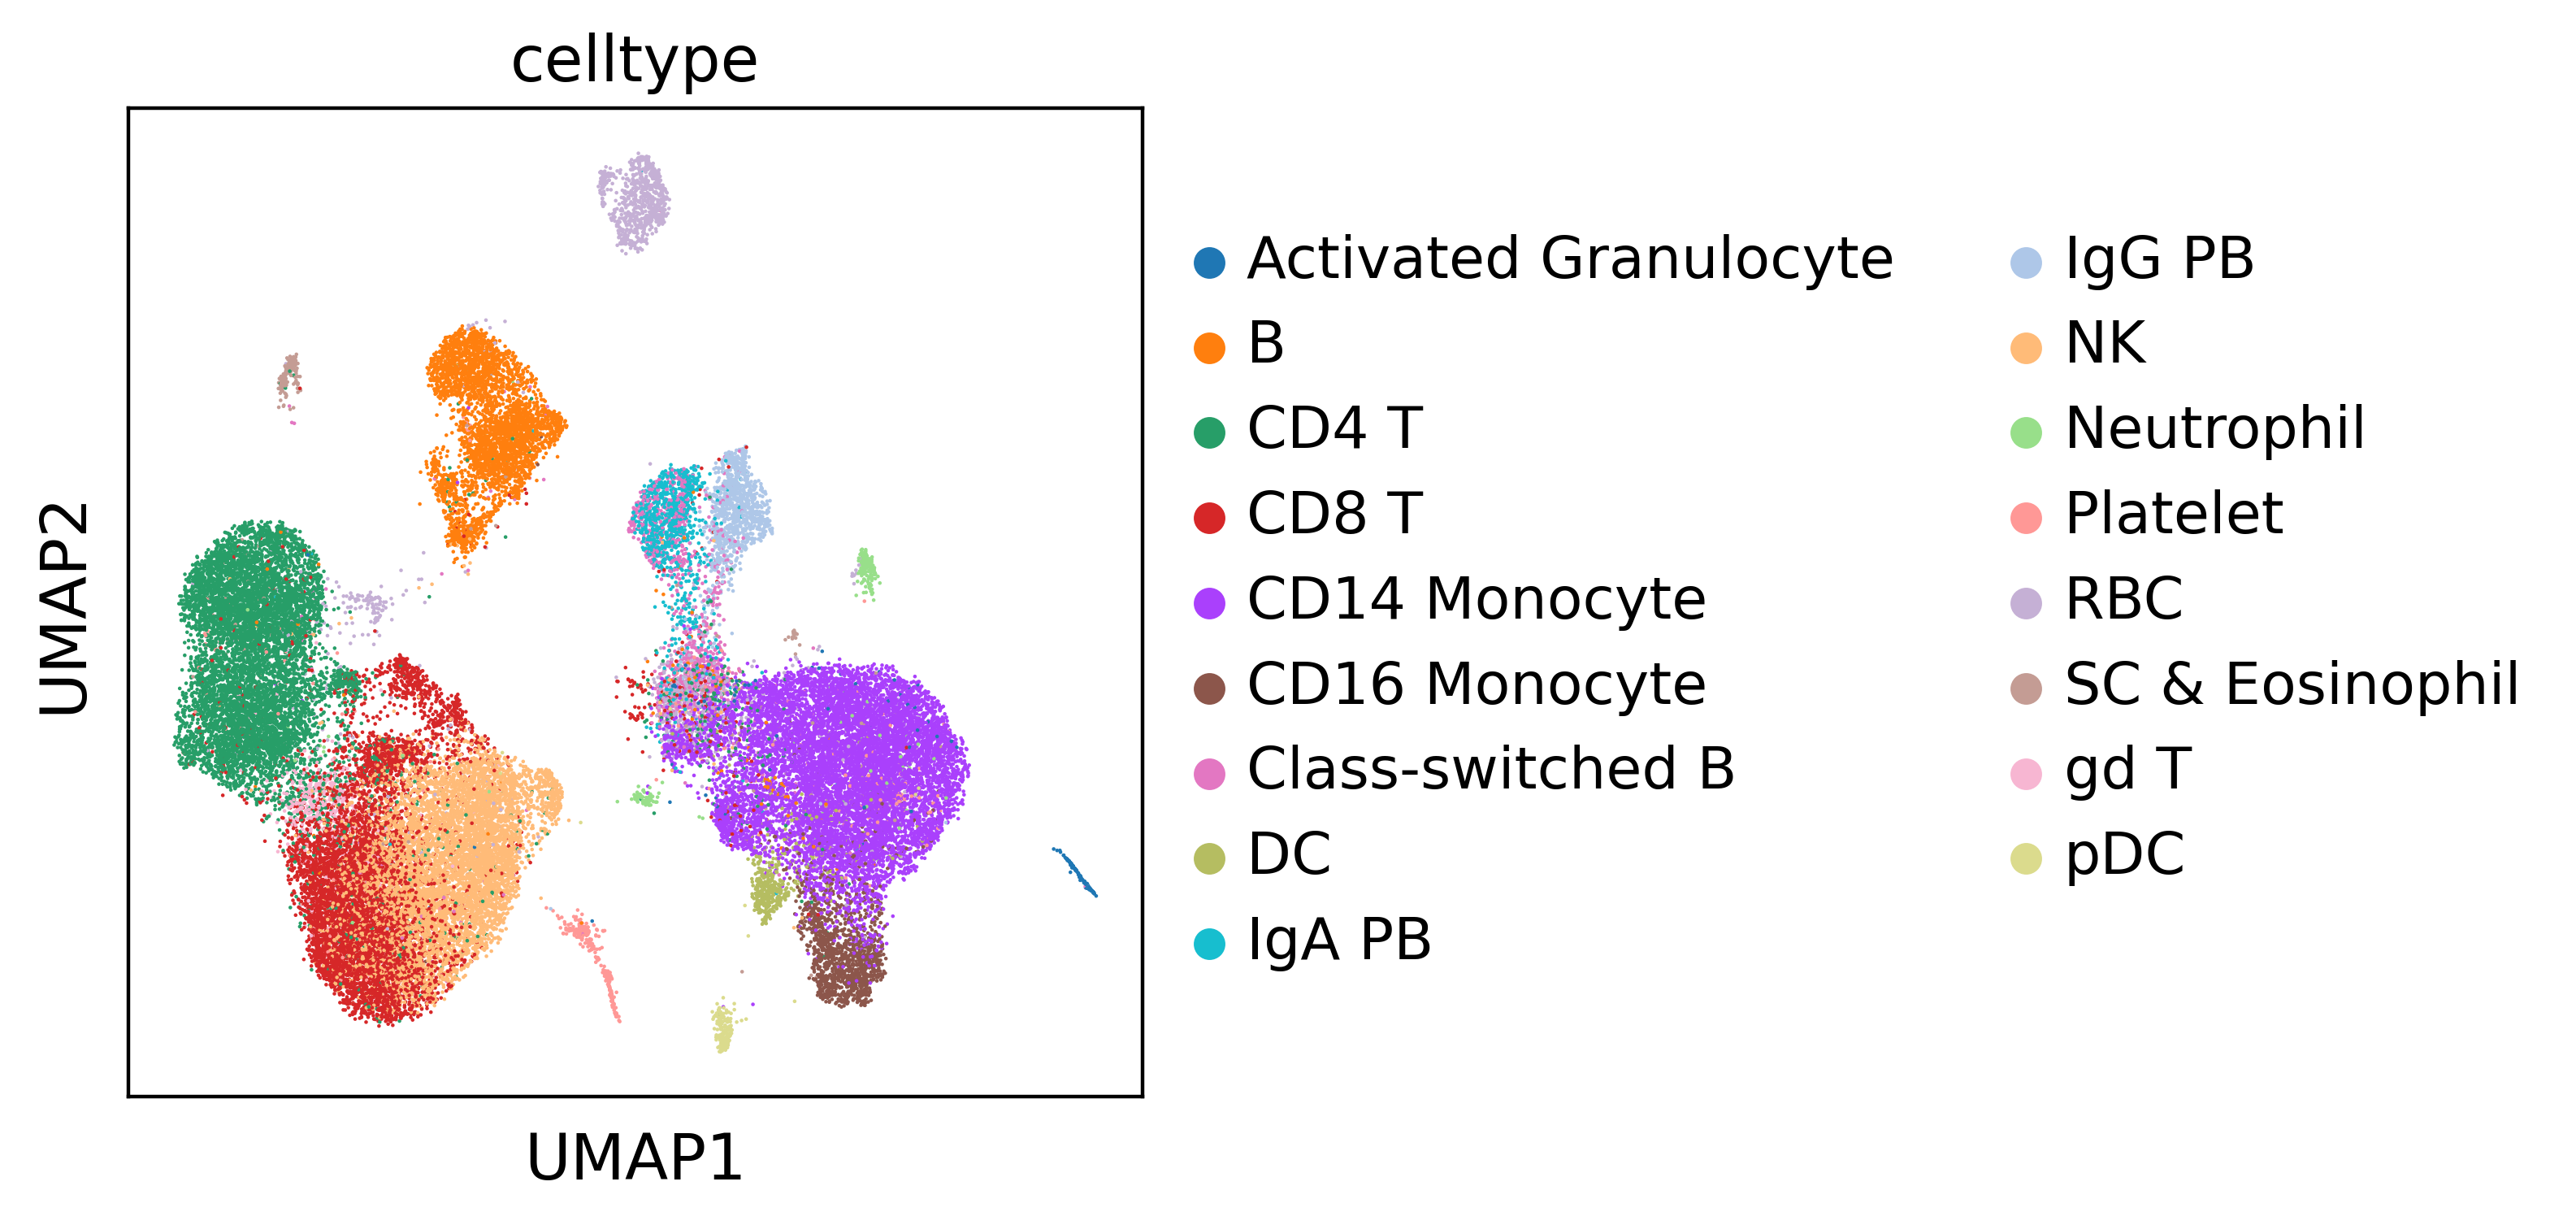

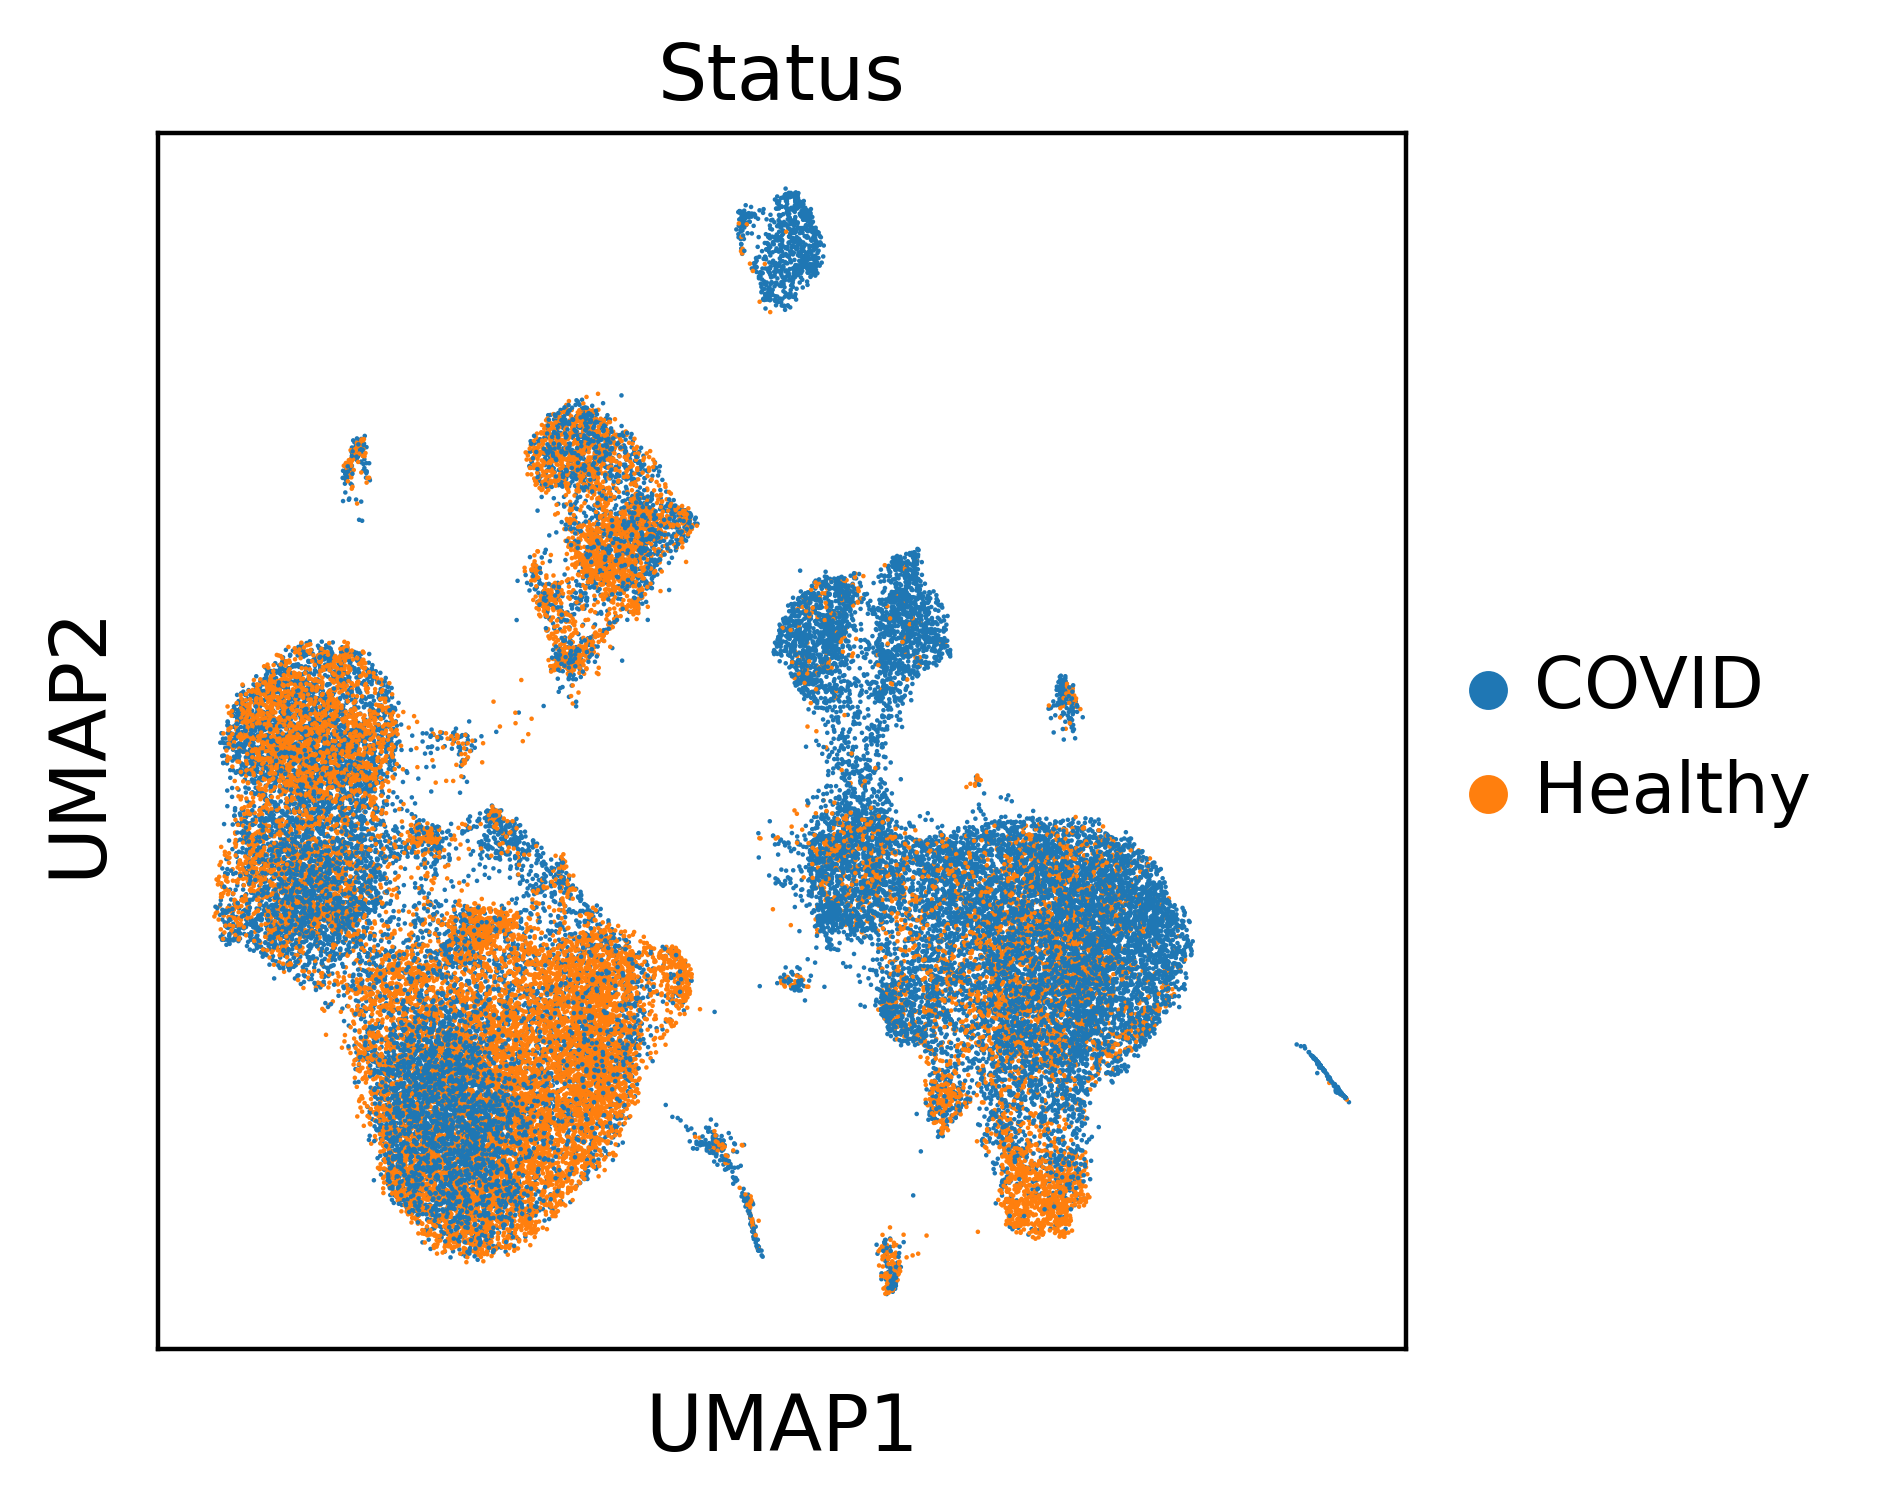

In [10]:
sc.pl.umap(
    adata_full,
    color = ["celltype"],
    #frameon = False,
)
sc.pl.umap(
    adata_full,
    color = ["Status"],
    #frameon = False,
)

In [11]:
adata_full

AnnData object with n_obs × n_vars = 44721 × 3000
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler', '_scvi_batch', '_scvi_labels', 'batch', 'celltype'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'umap', 'celltype_colors', 'Status_colors'
    obsm: 'X_scVI_full', 'X_scVI_query', 'X_umap'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [12]:
import pandas as pd
gene_info = pd.read_csv("/lustre/groups/ml01/workspace/weixu.wang/reference.mapping.DE/data/blish_sars/lfc_m.csv",index_col=0)

In [13]:
gene_info

DC        NK  Neutrophil      gd T         B     CD4 T  \
GM10568      -0.085447 -0.266680   -0.130359 -0.176025 -0.051102 -0.708467   
LYPLA1       -0.073179  0.249523    0.329716 -0.197066  0.113514 -0.042137   
TCEA1         0.195234  0.180068    0.092801 -0.015428  0.022756  0.141315   
ATP6V1H       0.079606 -0.182057    0.299938  0.131324 -0.163095 -0.178565   
OPRK1         0.256527  0.137153   -0.240484 -0.001423  0.093125  0.290692   
...                ...       ...         ...       ...       ...       ...   
LOC100039147  0.259379 -0.188110   -1.163121 -3.242710 -2.461885 -2.717046   
LOC665746     0.323521 -0.196244   -1.205618 -3.381329 -2.707443 -2.459138   
LOC665128     0.328641 -0.105586   -1.248373 -3.163867 -2.243252 -2.262884   
RBM31Y        0.008724  0.032533   -0.533091 -0.106830 -0.138668  0.026769   
LOC100040235  0.260594 -0.041351   -1.284871 -2.939104 -2.405700 -2.336304   

                 CD8 T  
GM10568      -0.090569  
LYPLA1       -0.191923  
TCEA1        -0.026022  
ATP6V1H      -0.284627  
OPRK1         0.017502  
...                ...  
LOC100039147  2.644001  
LOC665746     2.578599  
LOC665128     2.378497  
RBM31Y       -0.068047  
LOC100040235  2.509464  

[21755 rows x 7 columns]

In [14]:
### DC cell
full_de_df = full_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "DC"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)
query_de_df = query_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "DC"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


In [15]:
a = gene_info.index.values.tolist()
b = full_de_df.index.values.tolist()
c = list(set(a) & set(b))

In [16]:
full_de_df_f = full_de_df.loc[c,]
query_de_df_f = query_de_df.loc[c,]
gene_info_f = gene_info.loc[c,]

In [17]:
stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["DC"].values)

(0.20449734523322, 1.4649438534179148e-24)

In [18]:
stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["DC"].values)

(0.1816162139714353, 1.2563143005931853e-19)

In [19]:
scvi_cor_DC = stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["DC"].values)[0]
scarches_cor_DC = stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["DC"].values)[0]

In [20]:
### NK cell
full_de_df = full_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "NK"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)
query_de_df = query_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "NK"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


In [21]:
a = gene_info.index.values.tolist()
b = full_de_df.index.values.tolist()
c = list(set(a) & set(b))

In [22]:
full_de_df_f = full_de_df.loc[c,]
query_de_df_f = query_de_df.loc[c,]
gene_info_f = gene_info.loc[c,]

In [23]:
from scipy import stats
stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["NK"].values)

(0.2611030131790424, 1.670416964979358e-39)

In [24]:
stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["NK"].values)

(0.24352742119233922, 1.9610154684881824e-34)

In [25]:
scvi_cor_NK = stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["NK"].values)[0]
scarches_cor_NK = stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["NK"].values)[0]

In [26]:
### Neutrophil cell
full_de_df = full_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "Neutrophil"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)
query_de_df = query_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "Neutrophil"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/site-packages/scvi_tools-0.19.0-py3.7.egg/scvi/data/_utils.py:170: UserWarning: Category 13 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  category, alternate_column_key


DE...: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/site-packages/scvi_tools-0.19.0-py3.7.egg/scvi/data/_utils.py:170: UserWarning: Category 11 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  category, alternate_column_key


DE...: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


In [27]:
a = gene_info.index.values.tolist()
b = full_de_df.index.values.tolist()
c = list(set(a) & set(b))

In [28]:
full_de_df_f = full_de_df.loc[c,]
query_de_df_f = query_de_df.loc[c,]
gene_info_f = gene_info.loc[c,]

In [29]:
from scipy import stats
stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["Neutrophil"].values)

(0.22729808346352215, 4.226979505063788e-30)

In [30]:
stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["Neutrophil"].values)

(0.15875995176623675, 2.6236626634008863e-15)

In [31]:
scvi_cor_GN = stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["Neutrophil"].values)[0]
scarches_cor_GN = stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["Neutrophil"].values)[0]

In [32]:
### gd T cell
full_de_df = full_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "gd T"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)
query_de_df = query_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "gd T"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/site-packages/scvi_tools-0.19.0-py3.7.egg/scvi/data/_utils.py:170: UserWarning: Category 4 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  category, alternate_column_key


DE...: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/weixu.wang/miniconda3/envs/ref_dif_testing/lib/python3.7/site-packages/scvi_tools-0.19.0-py3.7.egg/scvi/data/_utils.py:170: UserWarning: Category 2 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  category, alternate_column_key


DE...: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


In [33]:
a = gene_info.index.values.tolist()
b = full_de_df.index.values.tolist()
c = list(set(a) & set(b))

In [34]:
full_de_df_f = full_de_df.loc[c,]
query_de_df_f = query_de_df.loc[c,]
gene_info_f = gene_info.loc[c,]

In [35]:
from scipy import stats
stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["gd T"].values)

(0.11071680070520315, 3.872965613501259e-08)

In [36]:
stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["gd T"].values)

(0.09560589349142211, 2.1095684837894277e-06)

In [37]:
scvi_cor_tgd = stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["gd T"].values)[0]
scarches_cor_tgd = stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["gd T"].values)[0]

In [38]:
### B cell
full_de_df = full_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "B"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)
query_de_df = query_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "B"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


In [39]:
a = gene_info.index.values.tolist()
b = full_de_df.index.values.tolist()
c = list(set(a) & set(b))

In [40]:
full_de_df_f = full_de_df.loc[c,]
query_de_df_f = query_de_df.loc[c,]
gene_info_f = gene_info.loc[c,]

In [41]:
from scipy import stats
stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["B"].values)

(0.12783584275443055, 2.1117414604749948e-10)

In [42]:
stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["B"].values)

(0.12490021542686716, 5.437453514498096e-10)

In [43]:
scvi_cor_B = stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["B"].values)[0]
scarches_cor_B = stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["B"].values)[0]

In [44]:
### CD4 T cell
full_de_df = full_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "CD4 T"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)
query_de_df = query_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "CD4 T"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


In [45]:
a = gene_info.index.values.tolist()
b = full_de_df.index.values.tolist()
c = list(set(a) & set(b))

In [46]:
full_de_df_f = full_de_df.loc[c,]
query_de_df_f = query_de_df.loc[c,]
gene_info_f = gene_info.loc[c,]

In [47]:
from scipy import stats
stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["CD4 T"].values)

(0.1726232932249923, 7.41890461662164e-18)

In [48]:
stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["CD4 T"].values)

(0.18562370985850696, 1.9034709073942388e-20)

In [49]:
scvi_cor_t4 = stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["CD4 T"].values)[0]
scarches_cor_t4 = stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["CD4 T"].values)[0]

In [50]:
### CD8 T cell
full_de_df = full_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "CD8 T"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)
query_de_df = query_model.differential_expression(
    adata = adata_full[adata_full.obs["celltype"] == "CD8 T"],
    groupby = "Status",
    group1 = "Healthy",
    group2 = "COVID"
)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
DE...: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


In [51]:
a = gene_info.index.values.tolist()
b = full_de_df.index.values.tolist()
c = list(set(a) & set(b))

In [52]:
full_de_df_f = full_de_df.loc[c,]
query_de_df_f = query_de_df.loc[c,]
gene_info_f = gene_info.loc[c,]

In [53]:
from scipy import stats
stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["CD8 T"].values)

(0.17963300886971567, 3.1459963246551406e-19)

In [54]:
stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["CD8 T"].values)

(0.18713987613329258, 9.217084008339e-21)

In [55]:
scvi_cor_t8 = stats.pearsonr(full_de_df_f["lfc_median"].values,gene_info_f["CD8 T"].values)[0]
scarches_cor_t8 = stats.pearsonr(query_de_df_f["lfc_median"].values,gene_info_f["CD8 T"].values)[0]

In [56]:
scvi_cor = [scvi_cor_DC, scvi_cor_NK, scvi_cor_GN, scvi_cor_tgd, scvi_cor_B, scvi_cor_t4, scvi_cor_t8]
scarches_cor = [scarches_cor_DC,scarches_cor_NK,scarches_cor_GN,scarches_cor_tgd,scarches_cor_B, scarches_cor_t4 ,scarches_cor_t8]

In [57]:
import numpy as np
Cor = scarches_cor+scvi_cor
Class = np.repeat("scarches",len(scarches_cor)).tolist()+np.repeat("scvi",len(scvi_cor)).tolist()

<AxesSubplot:xlabel='Cor', ylabel='Class'>

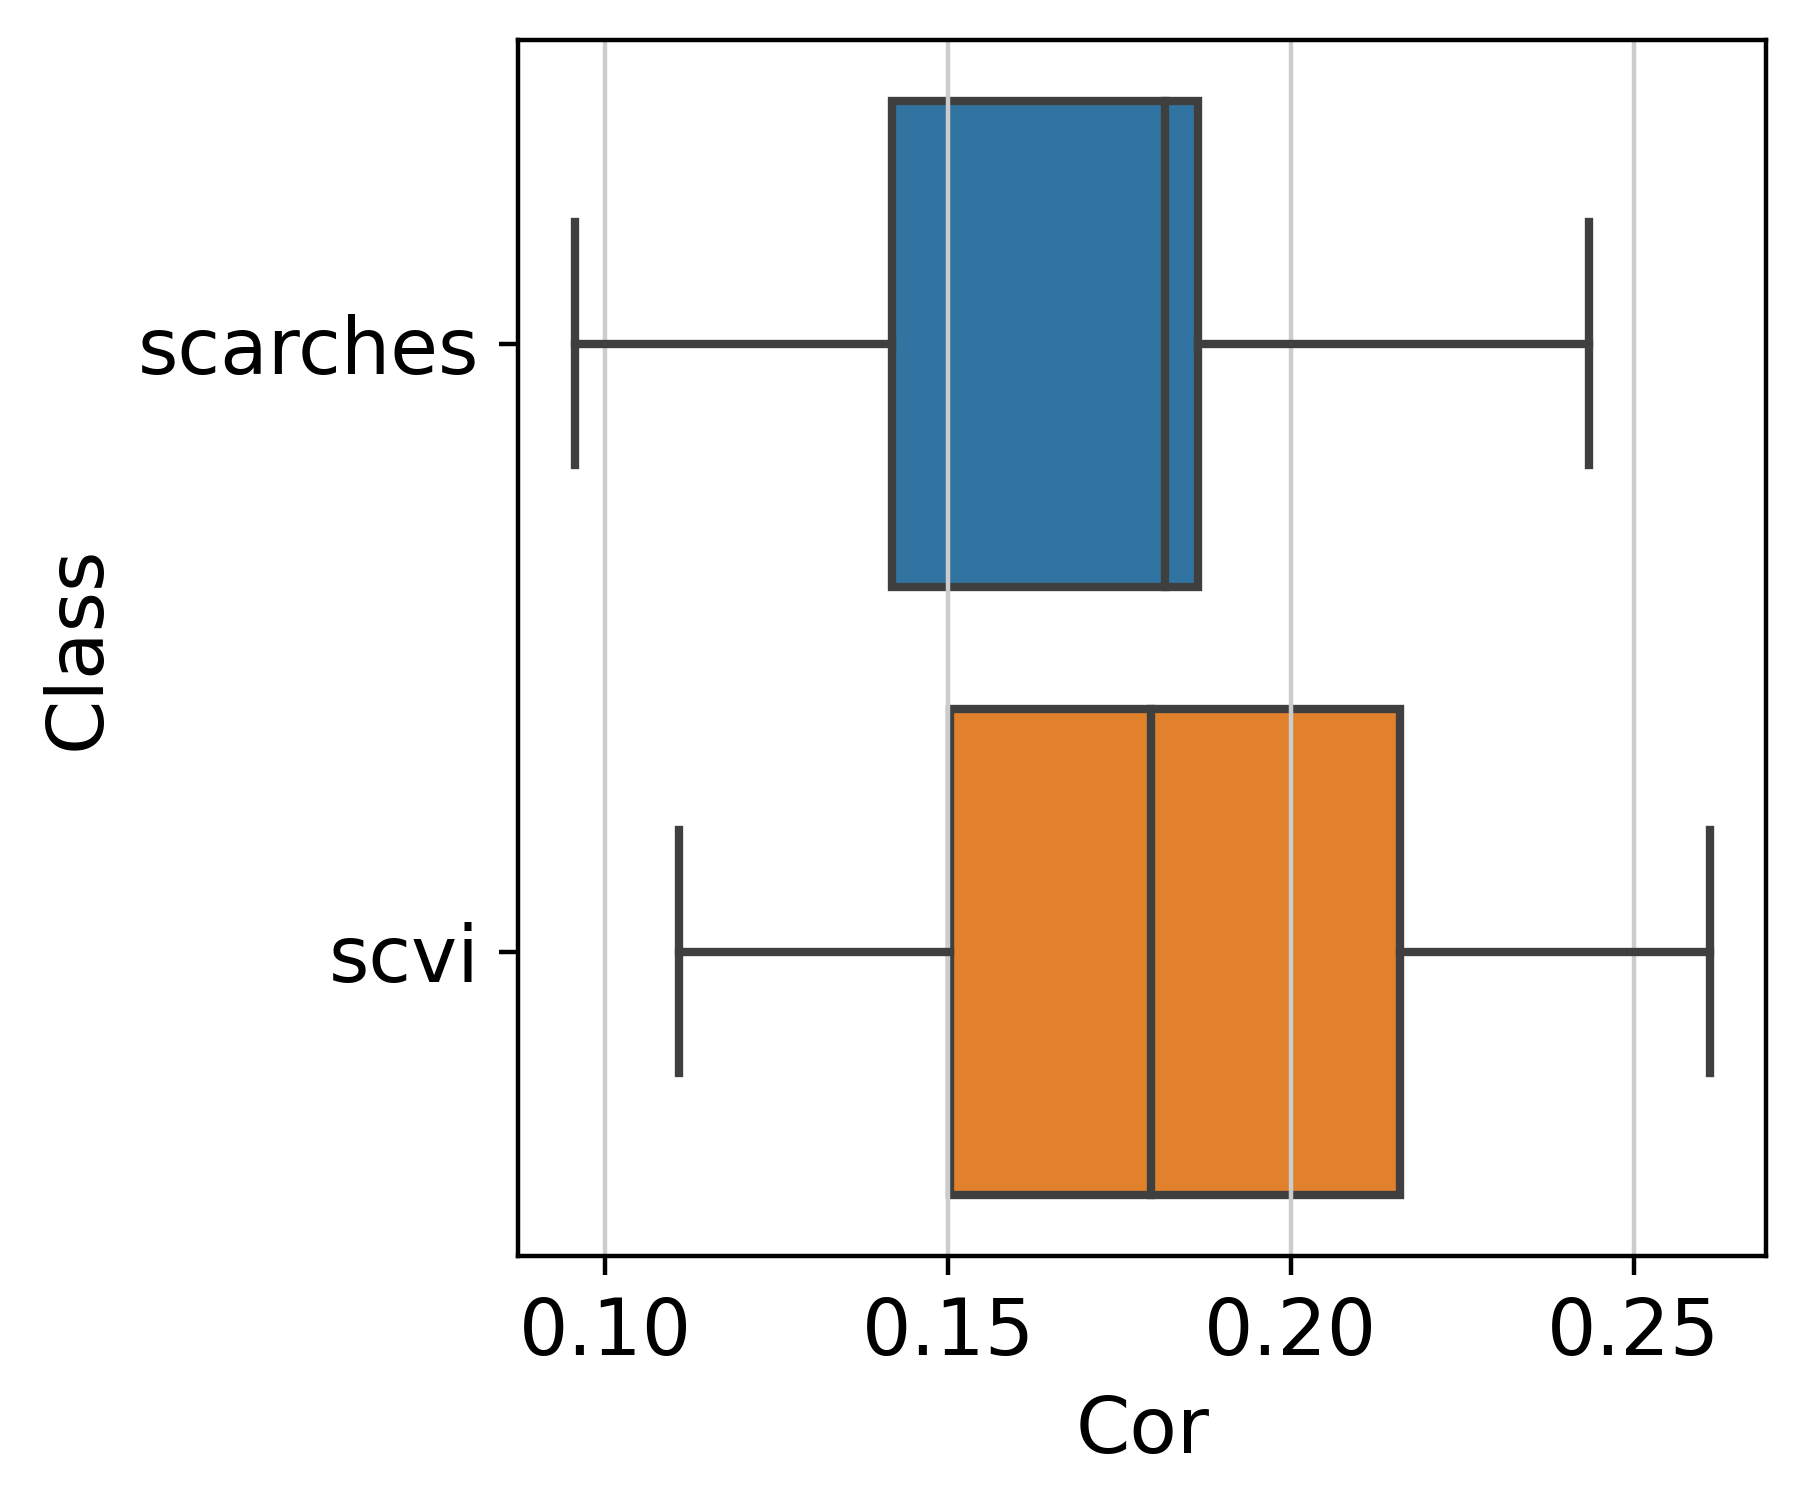

In [58]:
dat = pd.DataFrame([Class,Cor],index = ["Class","Cor"]).T
import seaborn as sns
sns.boxplot(data=dat, x="Cor", y="Class")

In [59]:
stats.ttest_rel(scarches_cor, scvi_cor,alternative='less')

Ttest_relResult(statistic=-1.491868614892309, pvalue=0.09316660605198904)

In [60]:
np.array(scarches_cor).mean()

0.16816761169144287

In [61]:
np.array(scvi_cor).mean()

0.1833867696328752